## Aufgabe 2

a) Laden Sie die Datenbank als zip-File aus Moodle herunter und lesen Sie dieses File direkt in ein neues Notebook ein. Die bisher verwendete Pandas-Methode read_csv() funktioniert für JSON-Files leider nicht. Das heruntergeladene File wird stattdessen mithilfe des Py- thonmoduls zipfile entpackt und dem Python-Befehl open() eingelesen. Die Umwandlung des JSON-Formates in ein geeignetes Python-Format erfolgt mit einem weiteren Modul der Python-Standardlibrary, json, hier mithilfe der Funktion json.load(). Lesen Sie dazu die zugehörigen, auf dem Web bzw. Stackoverflow verfügbaren Anleitungen.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [10]:
!pip install version-information
%load_ext version_information

import zipfile
import json


#filename_zip = "foods-2011-10-03.json.zip"
filename_json = "/content/drive/MyDrive/Studium/ML/foods-2011-10-03.json"

#archive = zipfile.ZipFile(filename_zip, 'r')
file = open(filename_json,'r')

data = json.load(file)

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


In [11]:
len(data)

6636

description und group kommen in beiden Dicts vor

In [12]:
data[500].keys()


dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [13]:
data[500].get("nutrients")


[{'description': 'Protein',
  'group': 'Composition',
  'units': 'g',
  'value': 14.6},
 {'description': 'Total lipid (fat)',
  'group': 'Composition',
  'units': 'g',
  'value': 4.7},
 {'description': 'Carbohydrate, by difference',
  'group': 'Composition',
  'units': 'g',
  'value': 23.5},
 {'description': 'Ash', 'group': 'Other', 'units': 'g', 'value': 54.7},
 {'description': 'Energy', 'group': 'Energy', 'units': 'kcal', 'value': 198.0},
 {'description': 'Water', 'group': 'Composition', 'units': 'g', 'value': 2.5},
 {'description': 'Energy', 'group': 'Energy', 'units': 'kJ', 'value': 828.0},
 {'description': 'Sugars, total',
  'group': 'Composition',
  'units': 'g',
  'value': 0.0},
 {'description': 'Fiber, total dietary',
  'group': 'Composition',
  'units': 'g',
  'value': 0.0},
 {'description': 'Calcium, Ca',
  'group': 'Elements',
  'units': 'mg',
  'value': 190.0},
 {'description': 'Iron, Fe',
  'group': 'Elements',
  'units': 'mg',
  'value': 1.87},
 {'description': 'Magnesium

Kopiere die Spalten **description**, **group**, **id** und **manufacturer** aus den Daten in ein eigenes DataFrame **info**

In [14]:
import pandas as pd
import numpy as np
info = pd.DataFrame(data, columns=["description","group","id","manufacturer"])
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


Array mit einzelnen DataFrames von Nutrients erstellen.

In [15]:
nutrients_list = []
index = 0
for elem in data:
    data_frame = pd.DataFrame(elem.get("nutrients"))
    head = [elem.get("id")] * len(data_frame)
    data_frame["id"] = head
    nutrients_list.append(data_frame)

nutrients = np.asarray(nutrients_list, dtype=object)
print(nutrients[1].head())

    value units                  description        group    id
0   24.90     g                      Protein  Composition  1009
1   33.14     g            Total lipid (fat)  Composition  1009
2    1.28     g  Carbohydrate, by difference  Composition  1009
3    3.93     g                          Ash        Other  1009
4  403.00  kcal                       Energy       Energy  1009


Array in ein großes DataFrame zusammenfassen.

In [16]:
nutrients_concat = pd.concat(nutrients)
print(nutrients_concat.head())
print(nutrients_concat.shape)

    value units                  description        group    id
0   25.18     g                      Protein  Composition  1008
1   29.20     g            Total lipid (fat)  Composition  1008
2    3.06     g  Carbohydrate, by difference  Composition  1008
3    3.28     g                          Ash        Other  1008
4  376.00  kcal                       Energy       Energy  1008
(389355, 5)


Duplikate aus der Nutrients Tabelle entfernen.

In [17]:
nutrients_nodup = nutrients_concat.drop_duplicates()
print(nutrients_nodup.head())
print(nutrients_nodup.shape)

    value units                  description        group    id
0   25.18     g                      Protein  Composition  1008
1   29.20     g            Total lipid (fat)  Composition  1008
2    3.06     g  Carbohydrate, by difference  Composition  1008
3    3.28     g                          Ash        Other  1008
4  376.00  kcal                       Energy       Energy  1008
(375176, 5)


Spalten umbenennen, damit Tabellen zusammengeführt werden können.

In [18]:
nutrients_clean = nutrients_nodup.rename(columns={"description" : "nutrient_description", "group" : "nutrient_group"})
print(nutrients_clean.head())

info_clean = info.rename(columns={"description" : "info_description", "group" : "info_group"})
print(info_clean.head())

    value units         nutrient_description nutrient_group    id
0   25.18     g                      Protein    Composition  1008
1   29.20     g            Total lipid (fat)    Composition  1008
2    3.06     g  Carbohydrate, by difference    Composition  1008
3    3.28     g                          Ash          Other  1008
4  376.00  kcal                       Energy         Energy  1008
                     info_description  ... manufacturer
0                     Cheese, caraway  ...             
1                     Cheese, cheddar  ...             
2                        Cheese, edam  ...             
3                        Cheese, feta  ...             
4  Cheese, mozzarella, part skim milk  ...             

[5 rows x 4 columns]


Einzelne Tabellen werden Zusammengeführt

In [19]:
new_data = pd.merge(nutrients_clean, info_clean, on="id", how="outer")
print(new_data.head())
print(new_data.shape)

    value units  ...              info_group manufacturer
0   25.18     g  ...  Dairy and Egg Products             
1   29.20     g  ...  Dairy and Egg Products             
2    3.06     g  ...  Dairy and Egg Products             
3    3.28     g  ...  Dairy and Egg Products             
4  376.00  kcal  ...  Dairy and Egg Products             

[5 rows x 8 columns]
(375176, 8)


DataFrame, dass nur Einträge mit der nutient_description "Zinc, Zn" enthält.

In [20]:
zinc_data = new_data[new_data["nutrient_description"].str.contains("Zinc, Zn")]
print(zinc_data.head())

     value units  ...              info_group manufacturer
14    2.94    mg  ...  Dairy and Egg Products             
75    3.11    mg  ...  Dairy and Egg Products             
151   3.75    mg  ...  Dairy and Egg Products             
222   2.88    mg  ...  Dairy and Egg Products             
293   2.76    mg  ...  Dairy and Egg Products             

[5 rows x 8 columns]


Zinkgehalt als Histogramm


(array([5.944e+03, 1.700e+02, 5.000e+00, 3.000e+00, 3.000e+00, 6.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([ 0.   ,  9.095, 18.19 , 27.285, 36.38 , 45.475, 54.57 , 63.665,
        72.76 , 81.855, 90.95 ]),
 <a list of 10 Patch objects>)

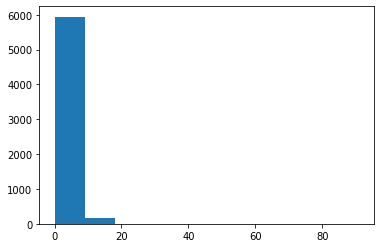

In [22]:
import matplotlib.pyplot as plt
zn_values = zinc_data["value"]
plt.hist(zn_values)

Grobe Beschreibung der Zinkenthaltenden Nahrungsmitteln.

In [23]:
zn_values.describe()

count    6137.000000
mean        2.228589
std         3.975321
min         0.000000
25%         0.340000
50%         0.980000
75%         2.980000
max        90.950000
Name: value, dtype: float64

Edamer hat mehr Zink als das durchschnittliche Nahrungsmittel, das Zink enthält.

In [24]:
edamer = zinc_data[zinc_data["info_description"].str.contains("Cheese, edam")]
edamer["value"] > zn_values.mean()

151    True
Name: value, dtype: bool

Edamer hat mehr Zink als 75% der Nährstoffe, die Zink enthalten.

In [25]:
count = 0
for value in zn_values:
    if edamer["value"].item() > value:
        count = count + 1

count > len(zn_values)*0.75

True

Der Nährstoff mit dem Maximalen Zinkgehalt ist **Mollusks, oyster, eastern, canned** mit 90,95mg Zink

In [26]:
zinc_data[zinc_data.value == zinc_data.value.max()]

,value,units,nutrient_description,nutrient_group,id,info_description,info_group,manufacturer
333726,90.95,mg,"Zinc, Zn",Elements,15170,"Mollusks, oyster, eastern, canned",Finfish and Shellfish Products,


In [27]:
%version_information numpy, pandas, matplotlib

Software versions
Python 3.7.12 64bit [GCC 7.5.0]
IPython 5.5.0
OS Linux 5.4.104+ x86_64 with Ubuntu 18.04 bionic
numpy 1.19.5
pandas 1.1.5
matplotlib 3.2.2
Fri Oct 22 09:09:54 2021 UTC